In [3]:
import cv2
import imutils
import numpy as np
import os
import matplotlib.pyplot as plt


In [4]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\USER\AppData\Local\Tesseract-OCR\tesseract.exe'

In [5]:
os.chdir("D:\cars")

In [35]:
img=cv2.imread("2.jpg")
img=cv2.resize(img,(600,400))

In [36]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray=cv2.bilateralFilter(gray,13,15,15)

In [37]:
edged=cv2.Canny(gray,30,200)
contours =cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(contours)
contours=sorted(contours,key=cv2.contourArea,reverse=True)[:10]
screenCnt = None

In [38]:
for c in contours :
    peri = cv2.arcLength(c,True)
    approx=cv2.approxPolyDP(c,0.018*peri,True)
    if len(approx)==4:
        
        screenCnt=approx
        break

In [39]:
if screenCnt is None:
    detected = 0
    print('no')
else:
    detected = 1
if detected ==1:
    cv2.drawContours(img,[screenCnt],-1,(0,0,255),3)

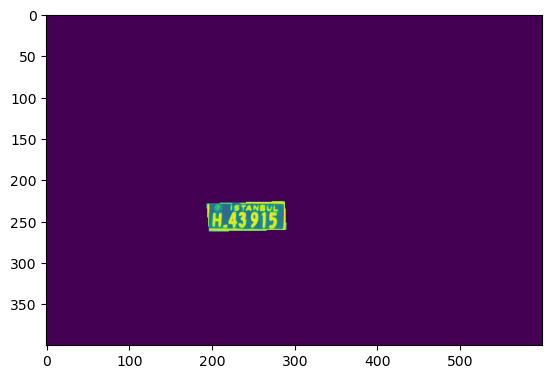

In [40]:
mask= np.zeros(gray.shape,np.uint8)

new_image=cv2.drawContours(mask,[screenCnt],0,255,-1,)
new_image=cv2.bitwise_and(gray,gray,mask=mask)
plt.imshow(new_image)

In [41]:
(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = gray[topx:bottomx+1, topy:bottomy+1]

In [42]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Users\DellPc\AppData\Local\Programs\Tesseract-OCR\tesseract.exe"
import pytesseract

In [45]:
text= pytesseract.image_to_string(Cropped, config='--psm 11')
print("plaka tanıma programlaması\n")
print("Plaka Numarası:",text)
img=cv2.resize(img,(500,300))
Cropped=cv2.resize(Cropped,(400,200))
cv2.imshow('araba',img)
cv2.imshow('kırpıldı',Cropped)
cv2.waitKey(0)
cv2.destroyAllWindows()

plaka tanıma programlaması

Plaka Numarası: 443918 |

